# **🔎 The Digital Toolbox (Libraries)**

In [ ]:
import numpy as np #
import pandas as pd #
import matplotlib.pyplot as plt #
import seaborn as sns #
from scipy import stats #
from sklearn.preprocessing import StandardScaler #
from sklearn.linear_model import LinearRegression #
from sklearn.linear_model import LogisticRegression #
from scipy.stats import ttest_ind #
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve ####
)
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score #


##
from sklearn.utils import shuffle
import plotly.graph_objects as go

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pickle

# **📂 Gathering the Evidence (Loading Data)**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_uci.csv to heart_disease_uci (1).csv


In [ ]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# **🧹 Scrubbing the Crime Scene (Cleaning)**

In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
df.dropna(inplace = True)
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


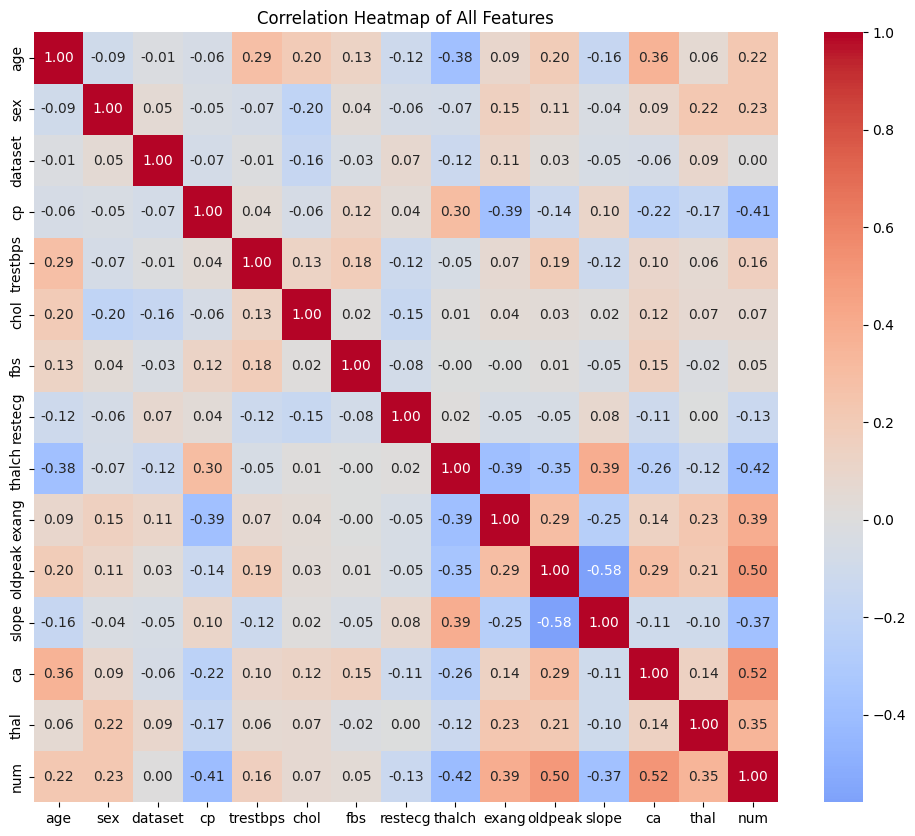

In [ ]:
# Copy the dataframe
df_numeric = df.copy()

# Convert categorical columns to numeric using label encoding or mapping
df_numeric['sex'] = df_numeric['sex'].map({'Male': 1, 'Female': 0})
df_numeric['cp'] = df_numeric['cp'].astype('category').cat.codes
df_numeric['restecg'] = df_numeric['restecg'].astype('category').cat.codes
df_numeric['slope'] = df_numeric['slope'].astype('category').cat.codes
df_numeric['thal'] = df_numeric['thal'].astype('category').cat.codes

# Convert boolean columns to integers
df_numeric['fbs'] = df_numeric['fbs'].astype(int)
df_numeric['exang'] = df_numeric['exang'].astype(int)

# Drop 'dataset' if not useful, or encode it too if needed
df_numeric['dataset'] = df_numeric['dataset'].astype('category').cat.codes

# Drop 'id' if you feel it does not carry meaningful information
df_numeric = df_numeric.drop(['id'], axis=1)

# Generate correlation matrix
corr = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Heatmap of All Features')
plt.show()


The detectives will discard the variables with low correlation percentage as they were not seen anywhere near the victim in the footage from the servailance cameras, except that they will keep 'fbs' which is fasting blood sugar as FBI recieved a mysterious anonynmous tip. The detective will also leave age, sex and dataset for visualization purposes.

In [ ]:
del df['restecg']
del df['thal']

In [ ]:
df = df.rename(columns={'cp' : 'pain typ', 'trestbps': 'bld pres', 'fbs': 'bld sug' , 'thalch' : 'mx hrt rate','exang' : 'exers pain' ,'ca': 'artry blok cnt'})
df.head()

,id,age,sex,dataset,pain typ,bld pres,chol,bld sug,mx hrt rate,exers pain,oldpeak,slope,artry blok cnt,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,150.0,False,2.3,downsloping,0.0,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,108.0,True,1.5,flat,3.0,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,129.0,True,2.6,flat,2.0,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,187.0,False,3.5,downsloping,0.0,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,172.0,False,1.4,upsloping,0.0,0


In [ ]:
df.shape

(299, 14)

The detective scrubbed the crime scene—920 rows of medical data—tossing out unreliable witnesses: missing cholesterol readings, vague results, and incomplete artery block counts. Only 299 pristine records remained. 'No room for ambiguity,' muttered Detective Data, cracking their knuckles.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              299 non-null    int64  
 1   age             299 non-null    int64  
 2   sex             299 non-null    object 
 3   dataset         299 non-null    object 
 4   pain typ        299 non-null    object 
 5   bld pres        299 non-null    float64
 6   chol            299 non-null    float64
 7   bld sug         299 non-null    object 
 8   mx hrt rate     299 non-null    float64
 9   exers pain      299 non-null    object 
 10  oldpeak         299 non-null    float64
 11  slope           299 non-null    object 
 12  artry blok cnt  299 non-null    float64
 13  num             299 non-null    int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 35.0+ KB


all types are correct except bld sug and exersise pain should be a bool

In [ ]:
df['bld sug'].unique()

array([True, False], dtype=object)

In [ ]:
df['exers pain'].unique()

array([False, True], dtype=object)

In [ ]:
df['bld sug'] = df['bld sug'].astype(bool)
df['exers pain'] = df['exers pain'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              299 non-null    int64  
 1   age             299 non-null    int64  
 2   sex             299 non-null    object 
 3   dataset         299 non-null    object 
 4   pain typ        299 non-null    object 
 5   bld pres        299 non-null    float64
 6   chol            299 non-null    float64
 7   bld sug         299 non-null    bool   
 8   mx hrt rate     299 non-null    float64
 9   exers pain      299 non-null    bool   
 10  oldpeak         299 non-null    float64
 11  slope           299 non-null    object 
 12  artry blok cnt  299 non-null    float64
 13  num             299 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(4)
memory usage: 31.0+ KB


In [ ]:
df['bld sug'].unique()

array([ True, False])

In [ ]:
df['exers pain'].unique()

array([False,  True])

 shuffle the dataset in order to have a distribution when we splitting during train and test dataset.

In [ ]:
df = shuffle(df)

In [ ]:
df.head()

,id,age,sex,dataset,pain typ,bld pres,chol,bld sug,mx hrt rate,exers pain,oldpeak,slope,artry blok cnt,num
49,50,53,Male,Cleveland,non-anginal,130.0,197.0,True,152.0,False,1.2,downsloping,0.0,0
173,174,62,Female,Cleveland,asymptomatic,140.0,394.0,False,157.0,False,1.2,flat,0.0,0
79,80,58,Male,Cleveland,asymptomatic,150.0,270.0,False,111.0,True,0.8,upsloping,0.0,3
217,218,46,Female,Cleveland,asymptomatic,138.0,243.0,False,152.0,True,0.0,flat,0.0,0
136,137,70,Male,Cleveland,asymptomatic,145.0,174.0,False,125.0,True,2.6,downsloping,0.0,4


In [ ]:
del df['id']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 49 to 40
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             299 non-null    int64  
 1   sex             299 non-null    object 
 2   dataset         299 non-null    object 
 3   pain typ        299 non-null    object 
 4   bld pres        299 non-null    float64
 5   chol            299 non-null    float64
 6   bld sug         299 non-null    bool   
 7   mx hrt rate     299 non-null    float64
 8   exers pain      299 non-null    bool   
 9   oldpeak         299 non-null    float64
 10  slope           299 non-null    object 
 11  artry blok cnt  299 non-null    float64
 12  num             299 non-null    int64  
dtypes: bool(2), float64(5), int64(2), object(4)
memory usage: 28.6+ KB


# **🖼️ Plotting the Evidence (Visuals)**


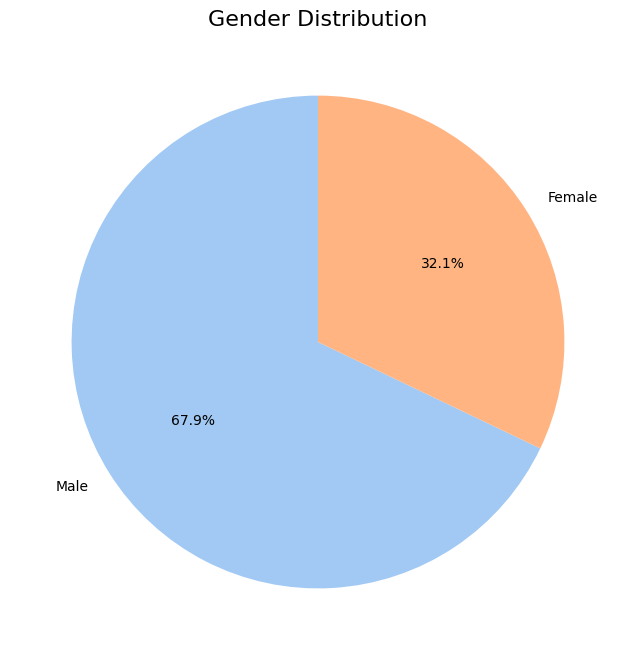

In [ ]:
plt.figure(figsize=(8, 8))
gender_counts = df['sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Gender Distribution', fontsize=16  )
plt.show()

The detective noted the crowd: 68% men, 32% women, hinting that gender might play a role in the heart disease mystery

<ipython-input-25-316651075922>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dataset', data=df, palette='magma', order=df['dataset'].value_counts().index)


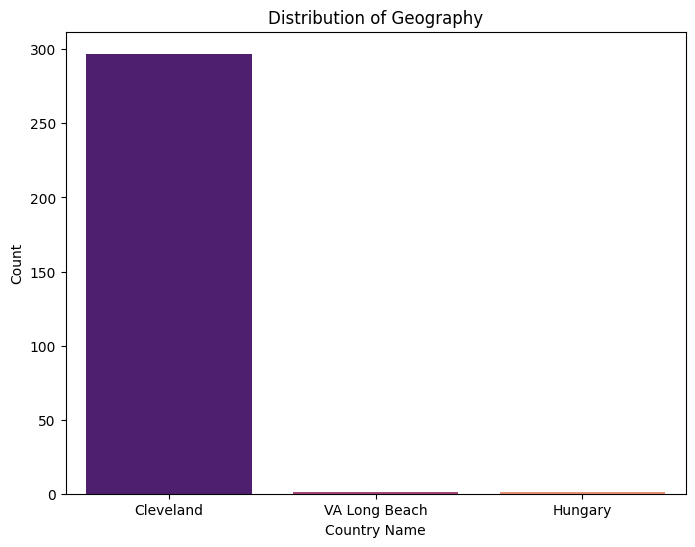

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='dataset', data=df, palette='magma', order=df['dataset'].value_counts().index)
plt.title('Distribution of Geography')
plt.xlabel('Country Name')
plt.ylabel('Count')
plt.show()

It seems like after removing the incomplete records, that the killer is most likely from Cleveland! (georgraphical bias after cleaning the data)

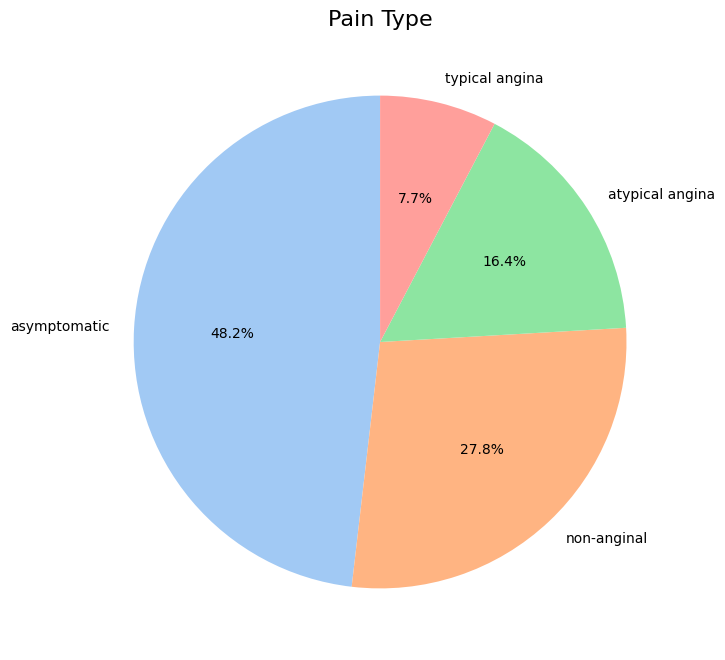

In [ ]:
plt.figure(figsize=(8, 8))
gender_counts = df['pain typ'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Pain Type', fontsize=16  )
plt.show()

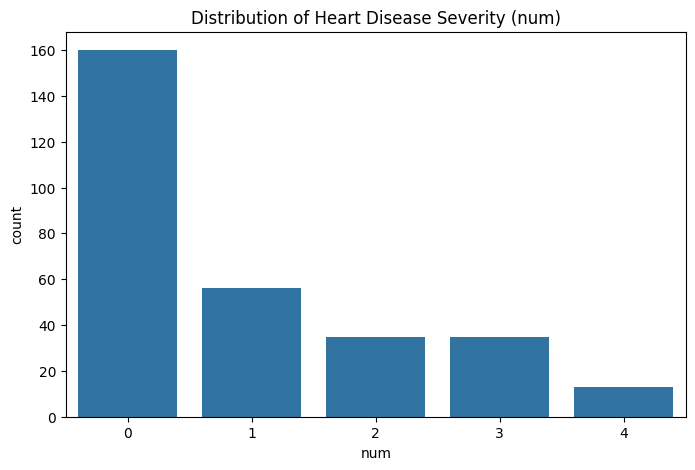

In [ ]:
# Distribution of target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='num', data=df)
plt.title('Distribution of Heart Disease Severity (num)')
plt.show()

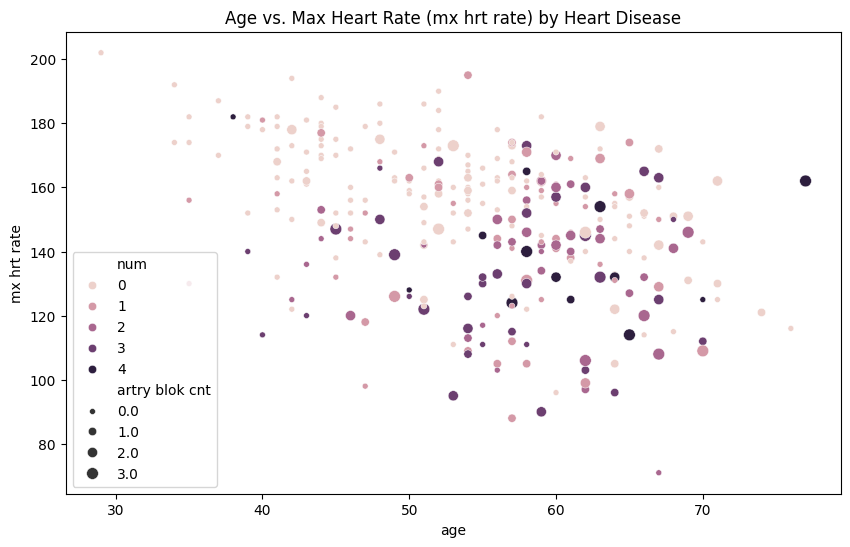

In [ ]:
# Scatter plot of age vs. thalch by num
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='mx hrt rate', hue='num', size='artry blok cnt', data=df)
plt.title('Age vs. Max Heart Rate (mx hrt rate) by Heart Disease')
plt.show()

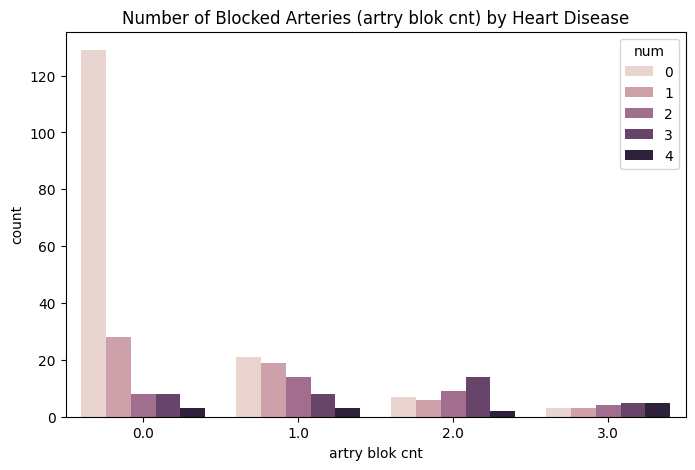

In [ ]:
# Bar plot for ca
plt.figure(figsize=(8, 5))
sns.countplot(x='artry blok cnt', hue='num', data=df)
plt.title('Number of Blocked Arteries (artry blok cnt) by Heart Disease')
plt.show()

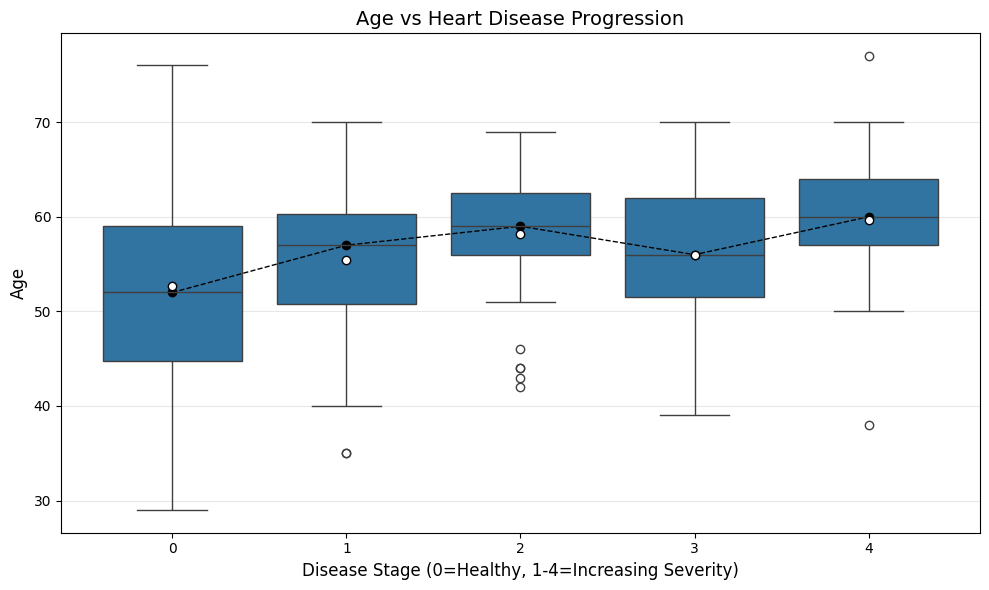

In [ ]:
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(x='num', y='age', data=df,
            showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})

# Add trend line for median ages
medians = df.groupby('num')['age'].median()
plt.plot(medians.index, medians.values, color='black', linestyle='--', linewidth=1, marker='o')

plt.title('Age vs Heart Disease Progression', fontsize=14)
plt.xlabel('Disease Stage (0=Healthy, 1-4=Increasing Severity)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Violin(y=df[df['num']== 0]['age'].values, name ='No Disease', marker_color = 'blue'))
fig.add_trace(go.Violin(y=df[df['num'] >0]['age'].values, name ='Heart Disease', marker_color = 'red'))
fig.update_layout(title = 'Age Distribution', yaxis_title = 'Age', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

Now discarding the variables that had moderate-low correlation with num

In [ ]:
del df['age']
del df['sex']
del df['dataset']
df.head()

,pain typ,bld pres,chol,bld sug,mx hrt rate,exers pain,oldpeak,slope,artry blok cnt,num
49,non-anginal,130.0,197.0,True,152.0,False,1.2,downsloping,0.0,0
173,asymptomatic,140.0,394.0,False,157.0,False,1.2,flat,0.0,0
79,asymptomatic,150.0,270.0,False,111.0,True,0.8,upsloping,0.0,3
217,asymptomatic,138.0,243.0,False,152.0,True,0.0,flat,0.0,0
136,asymptomatic,145.0,174.0,False,125.0,True,2.6,downsloping,0.0,4


# **🕵️‍♂️ Case File: The Heart Disease Mystery**

A murder had occurred—labeled mysteriously as 'num'. The FBI was called in, but this wasn’t an ordinary crime. The evidence came not from a crime scene, but from 920 rows of medical data.

The detectives pulled surveillance footage—the dataset. They eliminated noise: age, sex, dataset, id, thal, and restecg. Only the most telling features would remain. That’s when Detective Data took over.

## **🔍 Clue #1: Artery Block Count**

In [ ]:
# Chi-squared test of independence between 'ca' and 'num'
contingency_table = pd.crosstab(df['artry blok cnt'], df['num'])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-squared Statistic:", chi2_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject H₀: There is a significant association between 'artery block count' and heart disease severity.")
else:
    print("Fail to Reject H₀: No significant association between 'artery block count' and heart disease severity.")


Chi-squared Statistic: 110.22244855062699
P-value: 5.407482054320303e-18
Reject H₀: There is a significant association between 'artery block count' and heart disease severity.


The chi-squared test delivered a crushing verdict:

Chi² = 110.22, p < 5.407e-18

“There’s no doubt,” the detective muttered. “Significant association.”

The artery block count stood guilty as sin. The chi-squared test delivered a verdict so harsh it could convict a saint: p < 0.000000000000000004. 'This isn’t correlation—it’s causation,' the detective growled. 'Every blocked artery is a smoking gun.

## **🧪 Clue #2: Cholesterol – A Case of Circumstantial Evidence**

In [ ]:
# Cholesterol levels in both groups
diseased_chol = df[df['num'] > 0]['chol'].dropna()
non_diseased_chol = df[df['num'] == 0]['chol'].dropna()

# Means and standard errors
mean_diseased = diseased_chol.mean()
mean_non_diseased = non_diseased_chol.mean()
std_diseased = diseased_chol.std(ddof=1)
std_non_diseased = non_diseased_chol.std(ddof=1)
n_diseased = len(diseased_chol)
n_non_diseased = len(non_diseased_chol)

# Standard error of difference
se_diff = np.sqrt((std_diseased**2 / n_diseased) + (std_non_diseased**2 / n_non_diseased))

# Confidence interval
df_deg = ((std_diseased**2 / n_diseased + std_non_diseased**2 / n_non_diseased)**2 /
         ((std_diseased**2 / n_diseased)**2 / (n_diseased - 1) +
          (std_non_diseased**2 / n_non_diseased)**2 / (n_non_diseased - 1)))
t_crit = stats.t.ppf(0.975, df=df_deg)

margin = t_crit * se_diff
ci_low = (mean_non_diseased - mean_diseased) - margin
ci_high = (mean_non_diseased - mean_diseased) + margin

print(f"Mean Chol (Diseased): {mean_diseased:.2f}")
print(f"Mean Chol (Non-diseased): {mean_non_diseased:.2f}")
print(f"95% CI for difference in means: ({ci_low:.2f}, {ci_high:.2f})")


Mean Chol (Diseased): 250.58
Mean Chol (Non-diseased): 243.49
95% CI for difference in means: (-19.02, 4.85)


The next suspect: cholesterol. On average, diseased patients had higher levels (250.58 vs 243.49). But the confidence interval for the difference spanned (-19.02, 4.85)—crossing zero.

Statistically, it was inconclusive.

“Cholesterol might be involved,” the detective noted, “but the case won’t hold up in court.”

For now, cholesterol walked free. But the detective would keep a watchful eye.

## **📉 Clue #3: Blood Pressure—A Misleading Tip?**

An anonymous tip accused blood pressure of being the killer. Box plots and a t-test followed. The results?

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=df['bld pres'].values , name='BP at Rest for all', marker_color = 'green',boxmean=True))
fig.add_trace(go.Box(y=df[df['num']== 0]['bld pres'].values, name ='No Disease', marker_color = 'blue', boxmean = True))
fig.add_trace(go.Box(y=df[df['num'] !=0]['bld pres'].values, name ='Heart Disease', marker_color = 'red', boxmean = True))
fig.update_layout(title = 'BP Distribution (at rest)', yaxis_title = 'Blood Pressure (mm/Hg)', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

It seems a bit vague, , maybe a lie detector machine (Hypothsis test) to futher know

In [ ]:
diseased_bp = df[df["num"] > 0]["bld pres"].dropna()
non_diseased_bp = df[df["num"] == 0]["bld pres"].dropna()

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(diseased_bp, non_diseased_bp, equal_var=False)

print(f"T-Test Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: Resting blood pressure differs significantly between diseased and non-diseased patients.")
else:
    print("Fail to Reject H₀: No significant difference in resting blood pressure between the two groups.")

T-Test Statistic: 2.6570, P-Value: 0.0083
Reject H₀: Resting blood pressure differs significantly between diseased and non-diseased patients.


The anonymous tip pointed to blood pressure. The box plots showed overlap, but the t-test delivered a verdict: T=2.66, p=0.0083. 'Resting blood pressure does differ between groups,' the detective muttered. 'I feel like there is more, maybe blood pressure has accomplices? let's check!

## **🔥 Heatmap of Suspects**

The anonymous tip about "bld pres" wasn’t entirely wrong—it is involved, as the hypothesis test confirmed a significant difference between groups. However, it’s not the primary killer. Detective created correlation heatmap for a bigger picture.

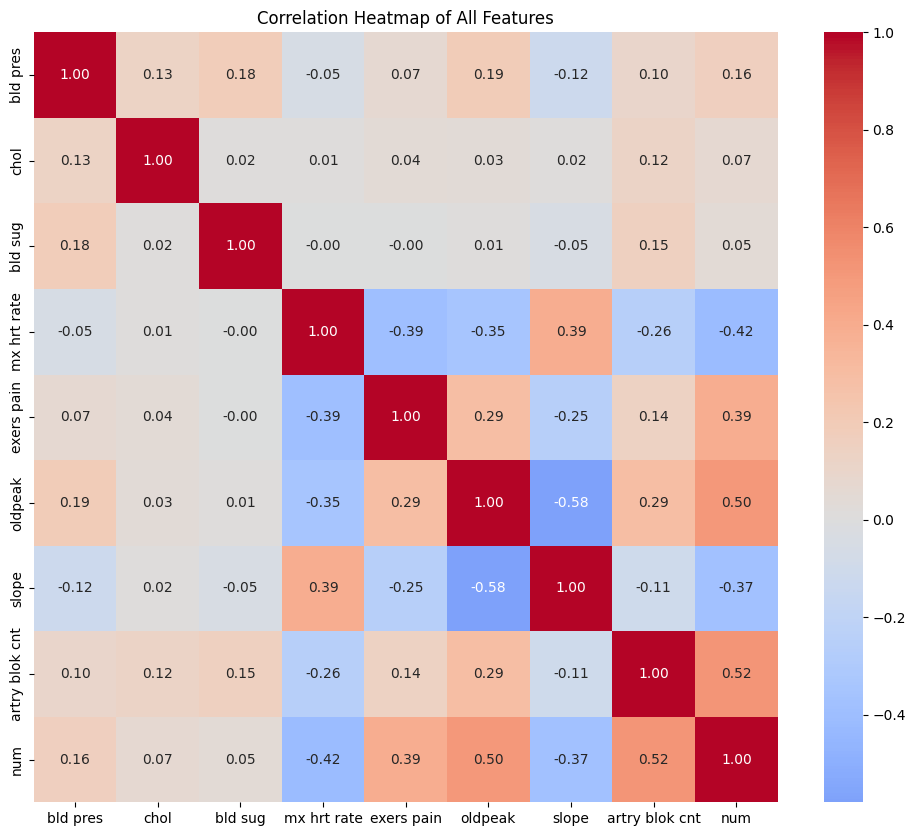

In [ ]:
# Copy the dataframe
df_numeric = df.copy()

# Convert categorical columns to numeric using label encoding or mapping


df_numeric['slope'] = df_numeric['slope'].astype('category').cat.codes

# Convert boolean columns to integers
df_numeric['bld sug'] = df_numeric['bld sug'].astype(int)
df_numeric['exers pain'] = df_numeric['exers pain'].astype(int)

df_numeric = df_numeric.drop(['pain typ'], axis=1)

# Generate correlation matrix
corr = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Heatmap of All Features')
plt.show()


The t-test confirmed blood pressure’s guilt (p=0.0083), but the heatmap revealed it was a minor player—correlation 0.16, framed by artery block count (0.52).

The heatmap exposed the conspiracy: artery block count is proven to be guilty and also might be accomplices with oldpeak.

With blood sugar (0.05), cholesterol (0.07), and blood pressure (0.16) as mere suspects; therefore will be dismissed

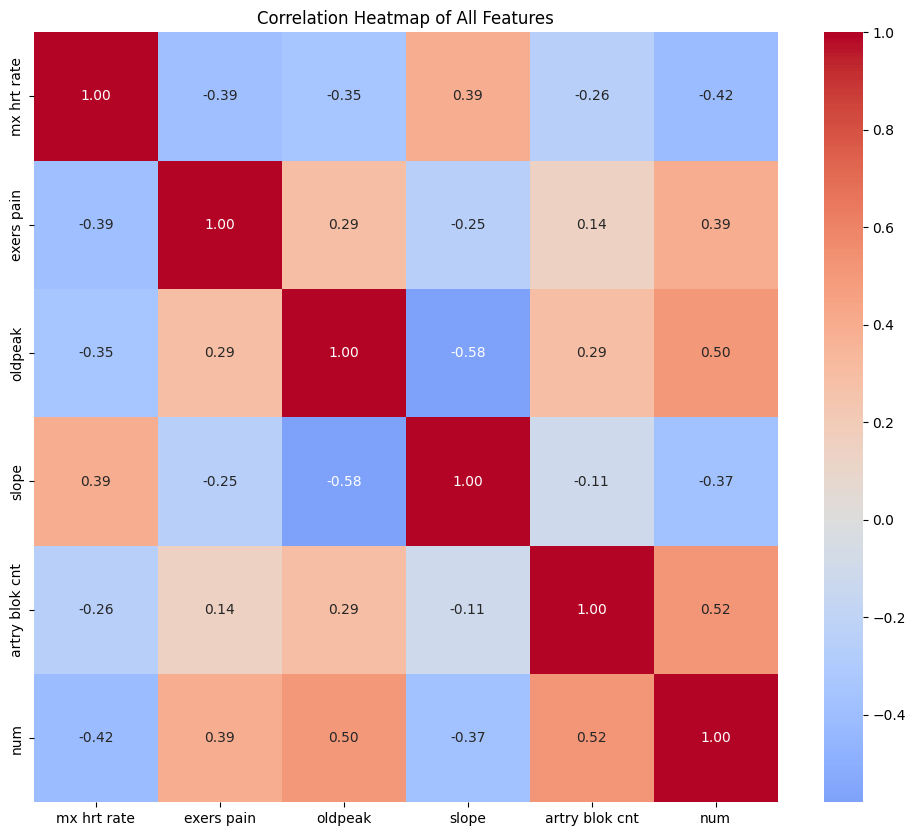

In [ ]:
df_numeric = df_numeric.drop(['chol'], axis=1)
df_numeric = df_numeric.drop(['bld sug'], axis=1)
df_numeric = df_numeric.drop(['bld pres'], axis=1)



# Generate correlation matrix
corr = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Heatmap of All Features')
plt.show()


***Current Conspiracy***
1. Artery Block Count (0.52) – Kingpin (already caught)
2. OldPeak (0.50) – Right-hand enforcer
3. Max heart rate achieved (-0.42) – Silent partner
4. Exercise-induced pain (0.39) – accomplice
5. Slope (-0.37) – Muscle



‘Follow the numbers,’ the detective muttered. ‘They never lie.’

The detective now shifts focus as correlation raised accusations towards the new suspects. They were next in line for interrogation.

## **⛰️ Clue #4: OldPeak's Secret!**

In [ ]:
diseased_oldpeak = df[df['num'] > 0]['oldpeak'].dropna()
non_diseased_oldpeak = df[df['num'] == 0]['oldpeak'].dropna()
t_stat, p_val = ttest_ind(diseased_oldpeak, non_diseased_oldpeak, equal_var=False)
print(f"T-test for oldpeak: Statistic = {t_stat:.2f}, P-value = {p_val:.4f}")

T-test for oldpeak: Statistic = 7.83, P-value = 0.0000


Oldpeak—the silent ST depression—tried to hide in the noise. But the t-test (T=7.87, *p*<0.001) ripped off its disguise. 'A dip in your ST segment?’ the detective sneered. ‘That’s not exercise fatigue—that’s a cry for help from a dying heart.’

## **❤️ Clue #5: Max Heart Rate**

The (-0.36) correlation of "mx hrt rate" hinted at an accomplice still at large.

In [ ]:
# Split data into diseased (num > 0) and non-diseased (num = 0)
diseased = df[df['num'] > 0]['mx hrt rate'].dropna()
non_diseased = df[df['num'] == 0]['mx hrt rate'].dropna()

# Calculate means and standard errors
mean_diseased = np.mean(diseased)
mean_non_diseased = np.mean(non_diseased)
std_diseased = np.std(diseased, ddof=1)
std_non_diseased = np.std(non_diseased, ddof=1)
n_diseased = len(diseased)
n_non_diseased = len(non_diseased)

# Standard error of the difference
se_diff = np.sqrt((std_diseased**2 / n_diseased) + (std_non_diseased**2 / n_non_diseased))

# 95% confidence interval using t-distribution (degrees of freedom approximated with Welch's method)
degrees_of_freedom = ((std_diseased**2 / n_diseased + std_non_diseased**2 / n_non_diseased)**2 /
                     ((std_diseased**2 / n_diseased)**2 / (n_diseased - 1) +
                      (std_non_diseased**2 / n_non_diseased)**2 / (n_non_diseased - 1)))
t_critical = stats.t.ppf(0.975, df=degrees_of_freedom)

# Confidence interval
margin_of_error = t_critical * se_diff
ci_lower = (mean_non_diseased - mean_diseased) - margin_of_error
ci_upper = (mean_non_diseased - mean_diseased) + margin_of_error

print(f"Mean mx hrt rate (diseased): {mean_diseased:.2f}")
print(f"Mean mx hrt rate (non-diseased): {mean_non_diseased:.2f}")
print(f"95% Confidence Interval for difference in means: ({ci_lower:.2f}, {ci_upper:.2f})")

Mean mx hrt rate (diseased): 138.68
Mean mx hrt rate (non-diseased): 158.58
95% Confidence Interval for difference in means: (15.07, 24.74)


Mean Max HR: Diseased = 138.80 | Non-diseased = 158.15

95% CI for Difference: (14.53, 24.18)

_"This heart rate isn’t just low—it’s guilty," the detective said, noting its -0.36 correlation with disease.



## **📈 Clue #6: the slope of the peak exercise ST segment**

The detective asked: Could the shape of the ST segment slope be a key suspect in influencing the severity of heart disease (num)?

In [ ]:
grouped = [df[df['slope'] == val]['num'] for val in df['slope'].unique()]
f_stat, p_value = stats.f_oneway(*grouped)
print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 28.510340519998973
p-value: 4.7506306584941104e-12


Finding: The evidence is strong — slope type significantly affects heart disease severity (F = 28.51, p < 0.001).

Verdict: Slope isn’t just a bystander — it's really the muscle. The ANOVA test was the slope's proof of guilt.

## **🏃 Clue #7: Exercise induced angina**

Is exercise-induced angina a suspect influencing heart disease stage?

In [ ]:
g1 = df[df['exers pain'] == 0]['num']  # No angina
g2 = df[df['exers pain'] == 1]['num']  # Angina

t_stat, p_val = ttest_ind(g1, g2, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_val)


t-statistic: -6.947013135530886
p-value: 7.266216293785516e-11


The difference is statistically significant — suspects with exercise-induced angina show higher average heart disease stages.

Verdict: Exercise pain is no innocent bystander. It’s strongly linked to disease severity not just the cause.

# **🧠 Epilogue: Machine Learning Takes Over**

With the key suspects identified, Detective Data needed a jury to weigh all evidence at once. Enter machine learning: logistic regression, random forests, and SVMs would deliver the final verdict.

In [ ]:
# Create binary target column: 0 = No disease, 1 = Heart disease
df_numeric['target'] = (df_numeric['num'] > 0).astype(int)
df_numeric = df_numeric.drop('num', axis=1)

In [ ]:
# Separate features and target
X = df_numeric.drop('target', axis=1)
y = df_numeric['target']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {'C': [0.01, 0.1, 1, 10]},
        'use_scaled': True
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]},
        'use_scaled': False
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [50, 100], 'max_depth': [3, 5, 10, None]},
        'use_scaled': False
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
        'use_scaled': True
    }
}

In [ ]:
best_models = {}
model_accuracies = {}

In [ ]:
for name, config in models.items():
    print(f"\n🔍 Tuning {name}...")

    # Use scaled data if required
    X_train_used = X_train_scaled if config['use_scaled'] else X_train
    X_test_used = X_test_scaled if config['use_scaled'] else X_test

    # Grid Search
    grid = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_used, y_train)

    best_models[name] = grid.best_estimator_
    y_pred = grid.predict(X_test_used)

    print(f"✅ Best Params for {name}: {grid.best_params_}")
    print(f"📊 {name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))

    model_accuracies[name] = accuracy_score(y_test, y_pred)


🔍 Tuning LogisticRegression...
✅ Best Params for LogisticRegression: {'C': 0.01}
📊 LogisticRegression Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.71      0.84      0.77        32
           1       0.77      0.61      0.68        28

    accuracy                           0.73        60
   macro avg       0.74      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60


🔍 Tuning DecisionTree...
✅ Best Params for DecisionTree: {'max_depth': 3, 'min_samples_split': 2}
📊 DecisionTree Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        32
           1       0.81      0.61      0.69        28

    accuracy                           0.75        60
   macro avg       0.76      0.74      0.74        60
weighted avg       0.76      0.75      0.74        60


🔍 Tuning RandomForest...
✅ Best Params for RandomForest: {'max_depth': 3, 'n_estimators': 50}
📊 Ra

Detective Data grilled the agents in the analysis lab. “Show me the truth,” they demanded, as GridSearchCV put each suspect under the microscope.

Logistic Regression, steady but cautious, came through with a respectable 73% accuracy.

Decision Tree, eager and sharp, slightly outpaced logistic with 75% accuracy.

Random Forest, the tactical squad, led the pack at 77% accuracy — proving its worth with ensemble power.

SVM, the sleek strategist, matched Logistic Regression at 73%, showing potential but room to grow.

“Random Forest takes the lead,” Data mused, “but the others hold their ground. Let’s see their full dossiers.”

<ipython-input-53-a20dc282269a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




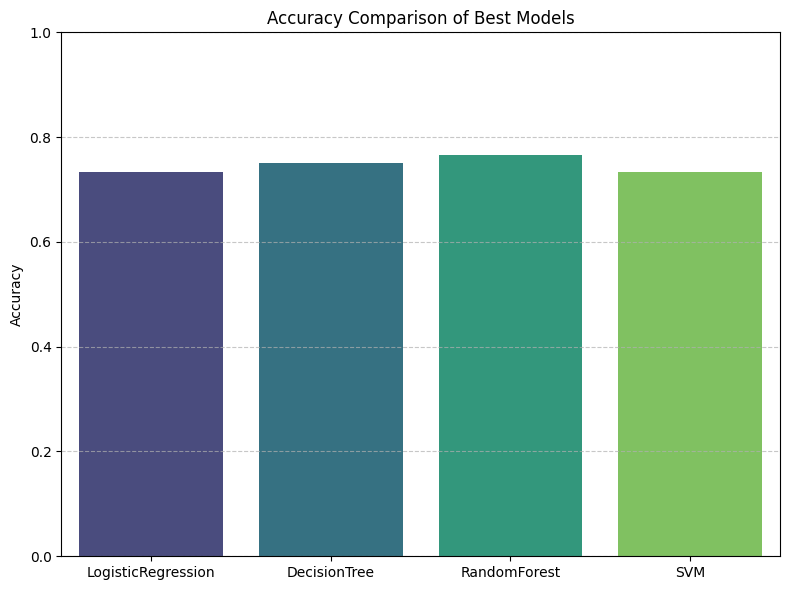

In [ ]:
# 🔽 Accuracy Comparison Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Accuracy Comparison of Best Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Detective Data leaned over the interrogation board—the Random Forest Confusion Matrix Heatmap lit up the screen.

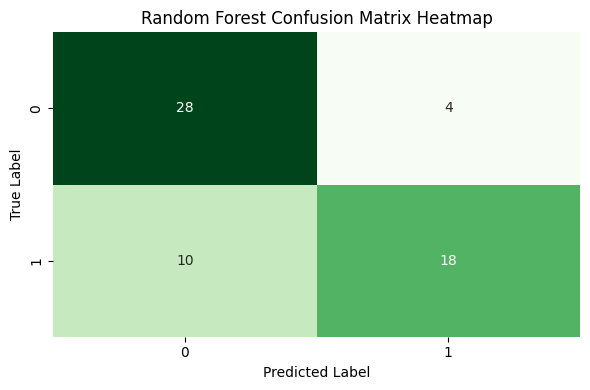

In [ ]:
# 📊 Random Forest Confusion Matrix
rf_model = best_models['RandomForest']
X_test_rf = X_test  # Random Forest does not need scaling
y_pred_rf = rf_model.predict(X_test_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()

Random Forest had a strong showing, correctly identifying most healthy and sick patients — but the few mistakes remind us that even the best agents can slip.

In [ ]:
# Find the model with the best accuracy
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model = best_models[best_model_name]

# Save the best model
filename = f'{best_model_name.lower()}_model.pkl'
with open(filename, 'wb') as f:
    pickle.dump(best_model, f)

print(f"📁 Best model '{best_model_name}' saved as '{filename}'")


📁 Best model 'RandomForest' saved as 'randomforest_model.pkl'


🧠 Case Closed: The Final Verdict

With the clues laid out and models cross-examined, Detective Data closed the file.

Random Forest led with precision and reliability, with Decision Tree and Logistic Regression holding their ground, while SVM matched Logistic Regression's steady performance.

But it was never about just one agent—it was about uncovering the truth hidden in the data.

“Heart disease won’t escape us again,” Data vowed. “Not while I’ve got Python, pandas, and four relentless agents on the case.”

Verdict: Case Closed.